<a href="https://colab.research.google.com/github/supanat-tht/tbla3-staff/blob/main/Week-02-Exercise01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)

© 2022 Copyright The University of New South Wales - CRICOS 00098G

**Author**: Oscar Perez-Concha: o.perezconcha@unsw.edu.au

**Contributors/Co-authors**: Marta Fredes-Torres, Zhisheng (Sandy) Sa and Matthew Sainsbury-Dale.

# Week 2: Linear Prediction

# Exercise 1: Diabetes Hospitalisations - Data Preparation (data exploration and manipulation)


# 1. Introduction: Machine Learning and Data Mining Work-Flow 

#### Step 1. Research question:

We should always have in mind the final goal (what we call the 'question' or step 1 in our machine learning work-flow) of the machine learning problem that we are trying to solve. In real life, we are always interested not just in accurate predictions, but in the use of these predictions as part of a larger decision making process.

In this set of exercises, <font color=green> <b> our final goal is to build a predictive algorithm to predict readmission to hospital 30 days after discharge. </b></font>

![alt text](https://drive.google.com/uc?export=view&id=105SGqeyo8RgLhSO8mN7ZE5OsG0YiLPKt)

####  Step 2. Data: Do we have the data to answer this research question?
In this case, the data set that we have in our hands was directly given to us by a committee that represents the 130 hospitals. We are not 100% sure whether the data will be good enough to answer our question. The committee would like to test precisely that. Can we answer our research question using these data?

####  Step 3. Data Gathering:

The third step is data gathering. We assume that we have passed ethics commitees, spoken to the different IT teams of the 130 hospitals, and come up with a way to extract, transfer and store the data in a secure environment in order to carry out our research. 

In terms of variables, we have in mind a set of variables that might be relevant to predict readmission. But as stated above, the hospital only authorized to share with us a specific sets of variables. In other words, this will be the first attempt to solve this problem by testing algorithms and variables. Otherwise, we will have to keep testing to find the correct set of variables and the best algorithm to solve the problem. 


####  Step 4. Exploratory Data Analysis

The forth step is visualisation and exploration of our data. We did part of this analysis in Chapter 1.
<b>In this exercise, we are going to explore with more detail our features and prepare our dataset for future analysis.</b>

## 1.1. Data Exploration and Manipulation: Preprocessing

We always need some type of data preprocessing. Why?

Different algorithms make different assumptions about your data and may require different transformations. 
Some features might be completely irrelevant for our purpose.
Other times, some features are not coded in the right way, or there are many missing values, ...



---



<font color=black><b> NB!!: During data cleaning process, the train and test sets are usually kept combined to maintain consistency between them. For example, when encoding a categorical variable, the same level of categories may not be present in both the sets. In such a case, they may be labelled differently if they are encoded separately. There are some researchers that prefer to split the data for visualization purposes in order to avoid what they call "data snooping bias", that is, to avoid our brain to spot patterns that may overfit our algorithm. We are not going to do this in this exercise.
    
<font color=black><b>    Having said that, we will have to distinguish when we have to carry out data manipulation with both sets combined, and when we have to split the dataset into training + test. For example, the last case will happen when we need to do some kind of imputation for missing variables. Let's say the feature age has some missing values. We might decide to impute these values with the median value of age. But watch out!! we will have to calculate the median age of the training set!!! We will impute these values in the training and test sets! Remember that the "test" set is "the simulated future". For that reason, no information from the test set should be leaked into the training set.
    
<font color=black><b>   In this exercise, all the cleaning will be carried out in the whole dataset. We can do that because the operations that we will do here will not leak any information from the "future" test set into the training set.



---



## 1.2. Aims of the Exercise:
 1. To manipulate our data to be in the right format for the predictive model that we selected.
 2. To select input variables.
 3. To continue becoming familiar with the diabetes inpatient hospital dataset and the clinical terms contained in it.

 This exercise aligns with the next course learning outcomes:
 
3. Apply machine learning workflow to health data problems.

## 1.3. Jupyter Notebook Intructions
1. Read the content of each cell.
2. Where necessary, follow the instructions that are written in each cell.
3. Run/Execute all the cells that contain Python code sequentially (one at a time), using the "Run" button.
4. For those cells in which you are asked to write some code, please write the Python code first and then execute/run the cell.

## 1.4. Tips
1. Run all the cells in sequence (one at a time), using the "Run" button.
2. To edit this notebook, just double-click in each cell. Choose between "Code" cell or text "Markdown" cell in the combo-box above. 
3. If you want to save your notebook, please make sure you press "the floppy disk" icon button above. 
4. To clean the content of all cells and re-start Notebook, please go to Cell->All Output->Clear

Follow the instructions given and if you have any questions, please use the **Comments section** in **Open Learning**. 

# 2. Docstring: 

Create a docstring with the variables and constants that you will use in this exercise (data dictionary) and the purpose of your program. It is expected that you choose informative variable names and document your program (both docstrings and comments).

<b> Write the answer here:</b>
(double-click here)
#####################################################################################################################

**== Aim/s ==**

**Data engineering**




**== Variables ==**

For _setup directory_

* `root` file path for google drive
* `project_path` file path for project data, output, notebook etc
* `original_pickle_path` file path for the pickle file saved from week 1 exercise 1
* `pickle_path` file path for pickle output

For _dataset preparation_ (i.e. feature/target and train/test)
- `hospital` pandas DataFrame object contains original data

For _Intermediate Variables_ (i.e. deleted after use)
- `dic_map` a dictionary used for mapping variables
- `readmission` a series object contains the variable 'readmission' from the dataset

For data _visualization_ and _analysis_
- `hospital_plot` pandas DataFrame to create long format data used in plotting


**== Constant (Universal) ==**

(add any constant variables here)

#####################################################################################################################

# 3. Load the data and select only desired columns.

For this chapter, we will be building a <b>logistic regression model to predict readmission</b>. This is a binary classification problem, meaning the target has only two outcomes: 'yes', and 'no'. 

Now, we will load the hospital dataset and manipulate the features that need some changes.
        
Some important points to have in mind:<p>
    
 1. The decision of which algorithm to  use will depend on several factors that we learn during the course. Here we tell you directly to use logistic regression because it is the classification algorithm that we learned in this lesson.<p>
    
 2. Time of prediction: 
 Since we are predicting readmission at discharge (this is the time that the prediction is made), it is reasonable to assume that we can use all the data available for *all* features. <p>
 When some data is given to us, we are tempted to assume that all the data is known at all times, and we can use all features for our predictive algorithm. However, this is often not the case. Let me explain this. 
     
     In **our example**, the data represents a hospital encounter or hospitalizations. We do not have time stamps of when a medication has been changed, or a lab test has been carried out. But what we know is that at discharge time, all this data is already in the electronic medical record. Therefore, we can use all this data if our time of prediction is discharge. 
 But if our time of prediction had been half way through the hospitalization, we should have been more careful and all the time stamps would have been needed.<p>
    
 As another example, if we wanted to predict length of stay (los), this is a value we would like to predict at the *beginning* of a patients stay. At the beginning of a patients stay, most of the lab tests wouldn't have been peformed, and we wouldn't know values such as number of procedures or surgeries performed, etc. Hence, we couldn't reasonably use all the features of the data set to predict length of stay.

In [88]:
import sys
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns

In [89]:
# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


If you are running this notebook in Google Colab, you must define your project paths. In this case, define your `project_path`. Otherwise, all the data will be lost after you close the session.

In [90]:
from pathlib import Path

if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    project_path = Path(root) / 'MyDrive' / 'HDAT9500' / 'week02'

    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()

We are using the `picke` that we already saved in a previous exercise. Feel free to use your own `pickle` (that is, the one you saved) or the one that is included in the GitHub (inside the `data/diabetes/` folder). If you decide to use the one in the GitHub, you will need to transfer this `pickle` to the correct folder in your Google Drive. Follow these 3 steps:


1) <b> Step 1:</b> Click on the `pickle` as per the image below:


![alt text](https://drive.google.com/uc?export=view&id=1QhdSYC0iDJVWByx6edREVEoo_QObuPop)


2) <b> Step 2:</b> Download the `pickle` but pressing the Download button on the lower right hand side of the screen (see image below) and copy the `pickle` into the right folder in your Google Drive. 

Remember that your Google Drive can be use as the storage cloud for your Google Colab. GitHub is also a storage cloud, but some items, such as the `pickles`, cannot be loaded directly from GitHub to Colab and that's why we have to follow this intermediate step.**bold text**


![alt text](https://drive.google.com/uc?export=view&id=1IX2pdrw-mDIOXKJHWx0IVHFfCAmm38-I)

3 <b> Step 3:</b> Drag and drop the `pickle` from the Download folder or wherever you downloaded to your correct folder in Google Drive as per the image below. In this case, the folder in Google drive was HDAT9500/week02/data/diabetes
You can create new folder by right clicking on the Google Drive space.

![alt text](https://drive.google.com/uc?export=view&id=1wZSTwmSdwEPZL8u1mmLaZ4T2OJyDkX4m)


In [91]:
import pickle
pickle_data_path = Path(project_path) /'data'/'diabetes'/'hospital.pickle'
with open(pickle_data_path, 'rb') as data:
   hospital = pickle.load(data)

In [92]:
# Sanity Check:
print(hospital.columns)
print(hospital.shape)

Index(['los', 'Age', 'sex', 'payer_code', 'medical_specialty', 'max_glu_serum',
       'A1Cresult', 'number_diagnoses', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_emergency', 'number_inpatient',
       'number_outpatient', 'group_name_1', 'group_name_2', 'group_name_3',
       'readmission', 'admission_type_id_cat', 'discharge_disposition_id_cat',
       'admission_source_id_cat'],
      dtype='object')
(69270, 21)


# 4. Grouping the features  'discharge_disposition_id',  'admission_source_id' and 'admission_type_id'.

As we could see in the [data dictionary](./data/diabetes/Data_Dictionary.pdf), the majority of discharges are 'Discharge home', followed by 'Discharged/Transferred to SNF' (SNF=Skilled Nursing Facility) and 'Discharge/Transferred to home with home health service'. One option could be to create a new variable, which pools some of these levels together.<p>
    For this, we will create a new variable named "discharge_disposition_grouped". It will retain the levels 'Discharge home', 'Discharged/Transferred to SNF', and 'Discharge/Transferred to home with home health service'. We will also create a new level named 'Discharged to rehab, another type of inpatient care institution or short term hospital', which will include all observations from 'Discharge/Transferred to another rehab fac including rehab units of a hospital', 'Discharge/Tranferred to another type of inpatient care institution', and 'Discharge/transferred to another short term hospital'. The rest of the data will be grouped into a new level named 'Other'.

**Method**<br/>
First, each of the id features are duplicated and stored in the dataset under the same name but ending with *grouped* rather than *id*. Then, we create a dictionary object containing the desired mappings from numeric ids to word description. Finally, we use the *.map()* function to map the ids to their descriptions and convert to string data type.

**Duplicating the columns**

In [93]:
# Duplicating each of the desired columns
hospital['discharge_disposition_grouped'] = hospital['discharge_disposition_id_cat']
hospital['admission_source_grouped'] = hospital['admission_source_id_cat']
hospital['admission_type_grouped'] = hospital['admission_type_id_cat']

********************************************************************************************************************************************************
**"admission_type_id" (Check [data dictionary](./data/diabetes/Data_Dictionary.pdf))**

**Counts and visualization for variable "admission_type_id" :**

In [94]:
print(hospital.admission_type_id_cat.value_counts())

1    25933
3    24270
2    11769
5     4134
4     2868
7      279
6       17
Name: admission_type_id_cat, dtype: int64


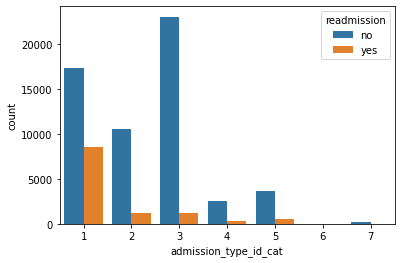

In [95]:
# Source: https://seaborn.pydata.org/generated/seaborn.countplot.html
ax = sns.countplot(x="admission_type_id_cat", hue="readmission", data=hospital)


**Using dictionary mapping for 'admission_type_grouped' (Source: [data dictionary](./data/diabetes/Data_Dictionary.pdf)):**

In [96]:
# Mapping admission_type_id to admission_type_grouped
dict_map = ({1:'Emergency' ,
             2:'Urgent',
             3:'Elective',
             4:'Not Available/Null',
             5:'Not Available/Null',
             6:'Trauma Centre',
             7:'Not Available/Null'})
hospital['admission_type_grouped'] = hospital['admission_type_grouped'].map(dict_map)
hospital['admission_type_grouped'] = hospital['admission_type_grouped'].astype(str)

In [97]:
#Sanity Check
hospital['admission_type_grouped'].value_counts()

Emergency             25933
Elective              24270
Urgent                11769
Not Available/Null     7281
Trauma Centre            17
Name: admission_type_grouped, dtype: int64

********************************************************************************************************************************************************
**"discharge_disposition_id" (Check [data dictionary](./data/diabetes/Data_Dictionary.pdf))**

**Counts and visualization for variable "discharge_disposition_id":**

In [98]:
print(hospital.discharge_disposition_id_cat.value_counts(sort=False))

1     43689
2      1534
3      8783
4       541
5       908
6      8276
7       398
8        73
9         8
12        2
15       40
16        3
17        8
18     2473
22     1410
23      260
24       25
25      746
27        3
28       90
Name: discharge_disposition_id_cat, dtype: int64


As you can see, the only incosistent category would be `discharge_disposition_id=10`, `Neonate discharged to another hospital for neonatal aftercare`.  We should not have (and you do not have) any record in that category, since our patients are all 18+ years old. Check the [data dictionary]

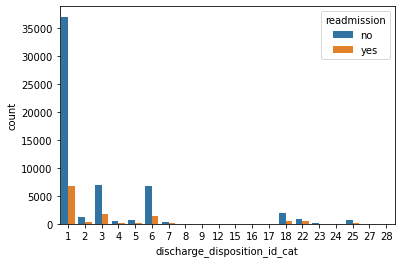

In [99]:
# Source: https://seaborn.pydata.org/generated/seaborn.countplot.html
ax = sns.countplot(x="discharge_disposition_id_cat", hue="readmission", data=hospital)


**Using dictionary mapping for 'discharge_disposition_grouped' (Source: [data dictionary](./data/diabetes/Data_Dictionary.pdf)):**

In [100]:
# Mapping admission_source_id to discharge_disposition_grouped
dict_map = ({1: 'Discharged to home',
             2: 'Short term hospital', 
             3: 'Transferred to SNF',
             4: 'Transferred to ICF', 
             5: 'Short term hospital',
             6: 'Home health service',
             7: 'Left AMA',
             8: 'Home health service',
             9: 'Other', 
             10: 'Other', 
             12: 'Other', 
             15: 'Other', 
             16: 'Other', 
             17: 'Other', 
             18: 'Not available/Null', 
             22: 'Short term hospital',
             23: 'Other',
             24: 'Other', 
             25: 'Not available/Null',
             27: 'Other',
             28: 'Other'
             })
hospital['discharge_disposition_grouped'] = hospital['discharge_disposition_grouped'].map(dict_map)
hospital['discharge_disposition_grouped'] = hospital['discharge_disposition_grouped'].astype(str)

In [101]:
#Sanity Check
hospital['discharge_disposition_grouped'].value_counts()

Discharged to home     43689
Transferred to SNF      8783
Home health service     8349
Short term hospital     3852
Not available/Null      3219
Transferred to ICF       541
Other                    439
Left AMA                 398
Name: discharge_disposition_grouped, dtype: int64

********************************************************************************************************************************************************
**"admission_source_id" (Check [data dictionary](./data/diabetes/Data_Dictionary.pdf))**

**Counts and visualization for variable "admission_source_id" (Check [data dictionary](./data/diabetes/Data_Dictionary.pdf)):**

In [102]:
print(hospital.admission_source_id_cat.value_counts())

7     44510
1     15826
11     4351
4      2014
6      1211
2       690
5       359
12      124
9        86
3        83
8         8
10        5
14        2
13        1
Name: admission_source_id_cat, dtype: int64


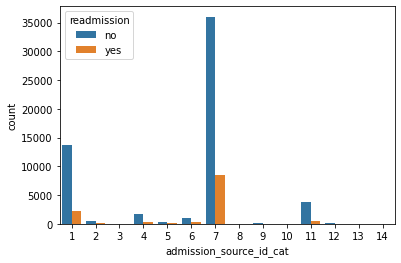

In [103]:
# Source: https://seaborn.pydata.org/generated/seaborn.countplot.html
ax = sns.countplot(x="admission_source_id_cat", hue="readmission", data=hospital)


**Using dictionary mapping for 'admission_source_grouped' (Source: [data dictionary](./data/diabetes/Data_Dictionary.pdf)):**

In [104]:
dict_map = ({1: 'Physician Referral',
             2: 'Clinic Referral',
             4: 'Transfer from another health care facility',
             5: 'Transfer from SNF', 
             6: 'Transfer from another health care facility',
             7: 'Emergency Room', 
             9: 'Not available/Null',
             11: 'Not available/Null',
             12: 'Not available/Null',
             3: 'Other',
             8: 'Other',
             10: 'Other',
             13: 'Other',
             14: 'Other'})
hospital['admission_source_grouped'] = hospital['admission_source_grouped'].map(dict_map)
hospital['admission_source_grouped'] = hospital['admission_source_grouped'].astype(str)

In [105]:
#Sanity Check
hospital['admission_source_grouped'].value_counts()

Emergency Room                                44510
Physician Referral                            15826
Not available/Null                             4561
Transfer from another health care facility     3225
Clinic Referral                                 690
Transfer from SNF                               359
Other                                            99
Name: admission_source_grouped, dtype: int64

**Delete 'id' features for discharge disposition, admission source and admission type.**

In [106]:
# Drop continuous variables for grouped variables
hospital = hospital.drop(['discharge_disposition_id_cat','admission_source_id_cat','admission_type_id_cat'], axis = 1)

In [107]:
# Check
hospital.columns

Index(['los', 'Age', 'sex', 'payer_code', 'medical_specialty', 'max_glu_serum',
       'A1Cresult', 'number_diagnoses', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_emergency', 'number_inpatient',
       'number_outpatient', 'group_name_1', 'group_name_2', 'group_name_3',
       'readmission', 'discharge_disposition_grouped',
       'admission_source_grouped', 'admission_type_grouped'],
      dtype='object')

# 5. Categorical data - Dummy variables

Linear models, as with many learning methods covered in this course, require strictly numeric inputs in order to <b>use scikit-learn in Python</b>.  We will need to convert our categorical features into numerics. To do this, we will use the concept of dummy variables methods covered in chapter 1.

## 5.1 Checking the levels of categorical variables with missing information.
We should check that each categorical column contains only the expected values, and no mispellings have occured. This is an important step when dealing with categorical variables, as it can remove many unexpected errors and results during analysis. 

In Chapter 1, we were able to visualise sections of missing data ('?') in the variables 'weight', 'payer_code' and 'medical_specialty'. In addition, we identified missing values regarding 'sex'. Therefore, we will define whether we should keep or delete the missing values by analysing the number of records in these categories.

**Lets look at the sex, weight, payer_code and medical_specialty variables.**

In [108]:
print(hospital.sex.value_counts())

Female             36841
Male               32426
Unknown/Invalid        3
Name: sex, dtype: int64


In [109]:
print(hospital.payer_code.value_counts())

?     29912
MC    19782
HM     3958
BC     3359
SP     3276
MD     2112
CP     1916
UN     1839
CM     1292
OG      645
PO      455
DM      364
WC      117
CH      111
OT       62
SI       37
MP       32
FR        1
Name: payer_code, dtype: int64


In [110]:
print(hospital.medical_specialty.value_counts())

?                         33422
InternalMedicine          10607
Family/GeneralPractice     4955
Emergency/Trauma           4370
Cardiology                 4206
                          ...  
Speech                        1
SportsMedicine                1
Dermatology                   1
Perinatology                  1
Neurophysiology               1
Name: medical_specialty, Length: 63, dtype: int64


**Decisions**
1. We notice that the Unknown/Invalid category from 'sex' variable has only 3 records. This is a very small sample size in comparison with the total number of records (~70,000). Thus, any pattern in readmission discovered based on the sex being Unknown/Invalid would most likely just be down to chance. Hence, we decide to delete these records.
2. Most records have missing values for 'payer_code' ('?'=29,922). Therefore, we will remove this variable from our dataset.
3. Most records have missing values for 'medical_specialty' ('?'=33,432). Therefore, we will remove this variable from our dataset.

In [111]:
# Deleting category Unknown/Invalid from sex variable
hospital = hospital[hospital.sex != 'Unknown/Invalid']
#Sanity Check
print(hospital.sex.value_counts())

Female    36841
Male      32426
Name: sex, dtype: int64


In [112]:
# Drop weight, payer_code and medical_specialty
hospital = hospital.drop(['payer_code','medical_specialty'],axis=1)

## 5.2 Creating the dummy variables
We already transformed our continuous variables that were categorical in the correct format ('admission_type_grouped', 'discharge_disposition_grouped', and 'admission_source_grouped'). Now that we have the data in an appropriate form, we are ready to create our dummy variables. 

In [113]:
# Checking the nature of the new grouped variables variables
hospital.dtypes

los                               int64
Age                               int64
sex                              object
max_glu_serum                    object
A1Cresult                        object
number_diagnoses                  int64
num_lab_procedures                int64
num_procedures                    int64
num_medications                   int64
number_emergency                  int64
number_inpatient                  int64
number_outpatient                 int64
group_name_1                     object
group_name_2                     object
group_name_3                     object
readmission                      object
discharge_disposition_grouped    object
admission_source_grouped         object
admission_type_grouped           object
dtype: object

We **do not** want to convert the response variable into a dummy variable. Therefore, we will follow these steps:

1) We will save the 'readmission' variable first. 


In [114]:
#  We save our output (y)
readmission = hospital['readmission']

2) We will then extract 'readmission' when we perform the `pd.get_dummies` transformation. 

3) We will add readmission back into the hospital data frame.

### <font color='brown'>Question 1: Write below the code to create dummy variables - one-hot encoded </font>
<font color='green'>Tip: Remember, we do not want to convert the response, 'readmission', to a dummy variable. You may want to use `DataFrame.drop('column name', axis = 1)`, to choose all but the specified columns.


In [115]:
#Type code here

hospital = hospital.drop('readmission', axis = 1)
hospital = pd.get_dummies(hospital)

In [116]:
pd.set_option('display.max_columns', 100)

In [117]:
# Sanity check
hospital.head()

,los,Age,number_diagnoses,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_outpatient,sex_Female,sex_Male,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,group_name_1_Blood_&_immune,group_name_1_CNS,group_name_1_Cancer,group_name_1_Cardiac_&_circulatory,group_name_1_Digestive,group_name_1_Endocrine,group_name_1_Infectious,group_name_1_Mental_&_Substance,group_name_1_Other,group_name_1_Respiratory,group_name_2_Blood_&_immune,group_name_2_CNS,group_name_2_Cancer,group_name_2_Cardiac_&_circulatory,group_name_2_Digestive,group_name_2_Endocrine,group_name_2_Infectious,group_name_2_Mental_&_Substance,group_name_2_Other,group_name_2_Respiratory,group_name_3_Blood_&_immune,group_name_3_CNS,group_name_3_Cancer,group_name_3_Cardiac_&_circulatory,group_name_3_Digestive,group_name_3_Endocrine,group_name_3_Infectious,group_name_3_Mental_&_Substance,group_name_3_Other,group_name_3_Respiratory,discharge_disposition_grouped_Discharged to home,discharge_disposition_grouped_Home health service,discharge_disposition_grouped_Left AMA,discharge_disposition_grouped_Not available/Null,discharge_disposition_grouped_Other,discharge_disposition_grouped_Short term hospital,discharge_disposition_grouped_Transferred to ICF,discharge_disposition_grouped_Transferred to SNF,admission_source_grouped_Clinic Referral,admission_source_grouped_Emergency Room,admission_source_grouped_Not available/Null,admission_source_grouped_Other,admission_source_grouped_Physician Referral,admission_source_grouped_Transfer from SNF,admission_source_grouped_Transfer from another health care facility,admission_type_grouped_Elective,admission_type_grouped_Emergency,admission_type_grouped_Not Available/Null,admission_type_grouped_Trauma Centre,admission_type_grouped_Urgent
0,2,79,9,38,0,12,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,5,59,8,49,0,16,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,2,33,5,62,0,15,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,6,42,9,77,0,30,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,62,7,13,5,6,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


As we dropped the column readmission  (when we used pd.get_dummies or sklearn.preprocessing.OneHotEncoder in question 1), we need to add it again.

In [118]:
hospital['readmission']=readmission

In [119]:
# Sanity check
hospital.head()

,los,Age,number_diagnoses,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_outpatient,sex_Female,sex_Male,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,group_name_1_Blood_&_immune,group_name_1_CNS,group_name_1_Cancer,group_name_1_Cardiac_&_circulatory,group_name_1_Digestive,group_name_1_Endocrine,group_name_1_Infectious,group_name_1_Mental_&_Substance,group_name_1_Other,group_name_1_Respiratory,group_name_2_Blood_&_immune,group_name_2_CNS,group_name_2_Cancer,group_name_2_Cardiac_&_circulatory,group_name_2_Digestive,group_name_2_Endocrine,group_name_2_Infectious,group_name_2_Mental_&_Substance,group_name_2_Other,group_name_2_Respiratory,group_name_3_Blood_&_immune,group_name_3_CNS,group_name_3_Cancer,group_name_3_Cardiac_&_circulatory,group_name_3_Digestive,group_name_3_Endocrine,group_name_3_Infectious,group_name_3_Mental_&_Substance,group_name_3_Other,group_name_3_Respiratory,discharge_disposition_grouped_Discharged to home,discharge_disposition_grouped_Home health service,discharge_disposition_grouped_Left AMA,discharge_disposition_grouped_Not available/Null,discharge_disposition_grouped_Other,discharge_disposition_grouped_Short term hospital,discharge_disposition_grouped_Transferred to ICF,discharge_disposition_grouped_Transferred to SNF,admission_source_grouped_Clinic Referral,admission_source_grouped_Emergency Room,admission_source_grouped_Not available/Null,admission_source_grouped_Other,admission_source_grouped_Physician Referral,admission_source_grouped_Transfer from SNF,admission_source_grouped_Transfer from another health care facility,admission_type_grouped_Elective,admission_type_grouped_Emergency,admission_type_grouped_Not Available/Null,admission_type_grouped_Trauma Centre,admission_type_grouped_Urgent,readmission
0,2,79,9,38,0,12,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,no
1,5,59,8,49,0,16,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,no
2,2,33,5,62,0,15,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,no
3,6,42,9,77,0,30,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,no
4,1,62,7,13,5,6,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,no


<div class="alert alert-block alert-warning">**End Activity**</div>

## 5.3 Saving our new cleaned dataset with dummy variables using 'pickle'.

For this we will use 'pickle'. Pickle is used to store python objects (lists, dictionaries, dataframes) in a file that we can call or load after. In our case, we will store our dataset in pickle and load it in the following exercises of this an other Chapters. 

First, we will open a file that we will call 'hospital_data.pickle'. Then, we will use `pickle.dump()` to put the dataset into the opened file, then close. [More information](https://docs.python.org/3/library/pickle.html)


In [120]:
import pickle
pickle_path = Path(project_path) /'hospital_data.pickle' # 'hospital.pickle' will be our final file

with open(pickle_path, 'wb') as output:
    pickle.dump(hospital, output)

Check that the `hospital_data.pickle` was saved correctly in your Google Drive:

![alt text](https://drive.google.com/uc?export=view&id=1iUskz06pIYefMaqNVdV93v1KW1xENFbu)

**Note:** If we want to load our dataset back, we can use the following script. We will use this code in the following exercise (no need to use it in this exercise).

In [121]:
# import pickle

# with open(pickle_path, 'rb') as data:
#    hospital = pickle.load(data)

© 2022 Copyright The University of New South Wales - CRICOS 00098G